# Training and Tuning

Oversimplification of a model is called **underfitting**. One characteristic of it is, that it **doesn't do well on the trainign set**. This is an error due to **bias**.

Overcomplification of a model is called **overfittimg**. The model is too specific. One characteristic of it is, that it **does well on the trainign set** but **doesn't do well on the testing set**. It tends to memorize it instead of learing its charactersitic.  This is an error due to **variance**.

## Model Complexity Graph

A model complexity graph helps us to determine the best model between underfitting and overfitting.

But in order to create a model complexity graph we need **validation data** as we are **not allowed to use testing data for training!!!**

This can be achieved with a third dataset for **Cross Validation**:

1. **Training Dataset**: Use it for traing of the model

2. **Validaten Dataset**: Use it for makeing devisions (e.g. Model Complexity Graph)

3. **Testing Dataset**: Use it for final testing

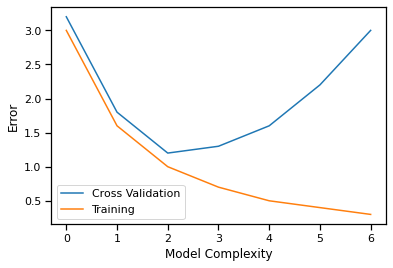

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('notebook', font_scale=1)

# simulated error from a training
cross_validation = [3.2, 1.8, 1.2, 1.3, 1.6, 2.2, 3]
training = [3, 1.6, 1, 0.7, 0.5, 0.4, 0.3]

sns.lineplot(data=cross_validation, label='Cross Validation')
sns.lineplot(data=training, label='Training')
plt.xlabel('Model Complexity')
plt.ylabel('Error');

$\implies$ Best model is at Model Complexitiy = **2**.

## Cross Validation

In order to **not lose** some **training data** for validation, we can use **K-Fold Cross Validation**.

In [94]:
import numpy as np
from sklearn.model_selection import KFold

X = np.random.random(100)                   # 100 normal distributed observations
y = np.random.randint(0, 2, 100)            # 2 features

kf = KFold(n_splits=10, shuffle=True)
kf.get_n_splits(X)

10

In [95]:
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

In [96]:
X_train.shape

(90,)

In [97]:
X_test.shape

(10,)

## Detect Overfitting and Underfitting with Learning Curves

In [101]:
data = np.genfromtxt('data/learning-curves.csv', delimiter=',', skip_header=True)
X = data[:, :-1]
y = data[:, -1]

print(f'X is a matrix with shape {X.shape}')
print(f'y is a vector with shape {y.shape}')

X is a matrix with shape (100, 2)
y is a vector with shape (100,)


In [102]:
from sklearn.model_selection import learning_curve

# It is good to randomize the data before drawing Learning Curves
def randomize(X, Y):
    permutation = np.random.permutation(Y.shape[0])
    X2 = X[permutation,:]
    Y2 = Y[permutation]
    return X2, Y2

X2, y2 = randomize(X, y)

def draw_learning_curves(X, y, estimator, num_trainings):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X2, y2, cv=None, n_jobs=1, train_sizes=np.linspace(.1, 1.0, num_trainings))

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.grid()

    plt.title("Learning Curves")
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    plt.plot(train_scores_mean, 'o-', color="g",
             label="Training score")
    plt.plot(test_scores_mean, 'o-', color="y",
             label="Cross-validation score")


    plt.legend(loc="best")

    plt.show()

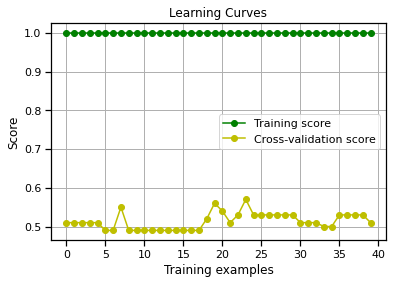

In [116]:
import pandas as pd
import numpy as np

data = pd.read_csv('data/learning-curves.csv')
X = np.array(data[['x1', 'x2']])
y = np.array(data['y'])

# Fix random seed
np.random.seed(55)

### Imports
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

# TODO: Uncomment one of the three classifiers, and hit "Test Run"
# to see the learning curve. Use these to answer the quiz below.

### Logistic Regression
#estimator = LogisticRegression()

### Decision Tree
#estimator = GradientBoostingClassifier()

### Support Vector Machine
estimator = SVC(kernel='rbf', gamma=1000)

draw_learning_curves(X, y, estimator, 40)

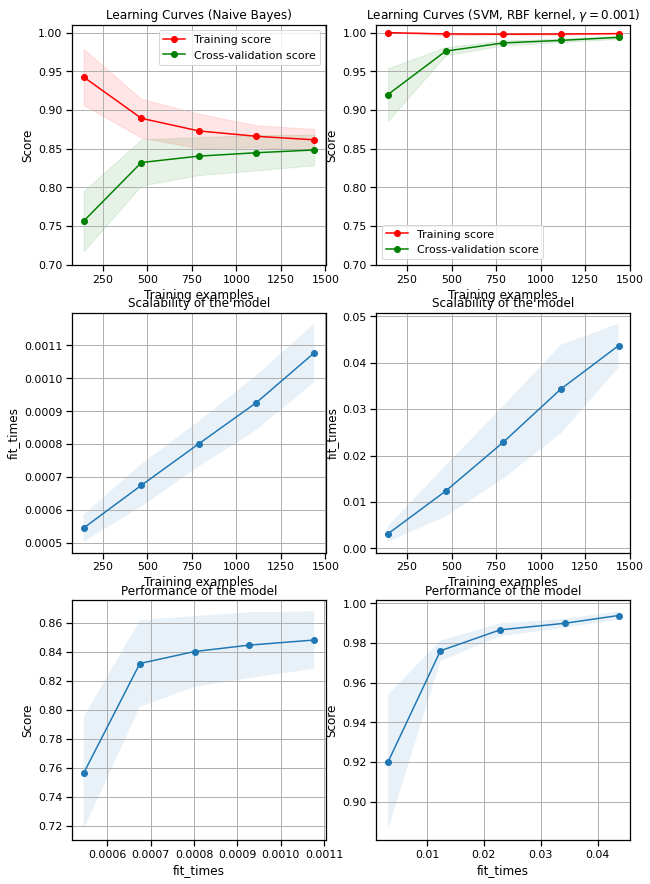

In [105]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(
    estimator,
    title,
    X,
    y,
    axes=None,
    ylim=None,
    cv=None,
    n_jobs=None,
    train_sizes=np.linspace(0.1, 1.0, 5),
):
    """
    Generate 3 plots: the test and training learning curve, the training
    samples vs fit times curve, the fit times vs score curve.

    Parameters
    ----------
    estimator : estimator instance
        An estimator instance implementing `fit` and `predict` methods which
        will be cloned for each validation.

    title : str
        Title for the chart.

    X : array-like of shape (n_samples, n_features)
        Training vector, where ``n_samples`` is the number of samples and
        ``n_features`` is the number of features.

    y : array-like of shape (n_samples) or (n_samples, n_features)
        Target relative to ``X`` for classification or regression;
        None for unsupervised learning.

    axes : array-like of shape (3,), default=None
        Axes to use for plotting the curves.

    ylim : tuple of shape (2,), default=None
        Defines minimum and maximum y-values plotted, e.g. (ymin, ymax).

    cv : int, cross-validation generator or an iterable, default=None
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:

          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, default=None
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like of shape (n_ticks,)
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the ``dtype`` is float, it is regarded
        as a fraction of the maximum size of the training set (that is
        determined by the selected validation method), i.e. it has to be within
        (0, 1]. Otherwise it is interpreted as absolute sizes of the training
        sets. Note that for classification the number of samples usually have
        to be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
        estimator,
        X,
        y,
        cv=cv,
        n_jobs=n_jobs,
        train_sizes=train_sizes,
        return_times=True,
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(
        train_sizes,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.1,
        color="r",
    )
    axes[0].fill_between(
        train_sizes,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
        color="g",
    )
    axes[0].plot(
        train_sizes, train_scores_mean, "o-", color="r", label="Training score"
    )
    axes[0].plot(
        train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score"
    )
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, "o-")
    axes[1].fill_between(
        train_sizes,
        fit_times_mean - fit_times_std,
        fit_times_mean + fit_times_std,
        alpha=0.1,
    )
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    fit_time_argsort = fit_times_mean.argsort()
    fit_time_sorted = fit_times_mean[fit_time_argsort]
    test_scores_mean_sorted = test_scores_mean[fit_time_argsort]
    test_scores_std_sorted = test_scores_std[fit_time_argsort]
    axes[2].grid()
    axes[2].plot(fit_time_sorted, test_scores_mean_sorted, "o-")
    axes[2].fill_between(
        fit_time_sorted,
        test_scores_mean_sorted - test_scores_std_sorted,
        test_scores_mean_sorted + test_scores_std_sorted,
        alpha=0.1,
    )
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt


fig, axes = plt.subplots(3, 2, figsize=(10, 15))

X, y = load_digits(return_X_y=True)

title = "Learning Curves (Naive Bayes)"
# Cross validation with 50 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=50, test_size=0.2, random_state=0)

estimator = GaussianNB()
plot_learning_curve(
    estimator, title, X, y, axes=axes[:, 0], ylim=(0.7, 1.01), cv=cv, n_jobs=4
)

title = r"Learning Curves (SVM, RBF kernel, $\gamma=0.001$)"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
estimator = SVC(gamma=0.001)
plot_learning_curve(
    estimator, title, X, y, axes=axes[:, 1], ylim=(0.7, 1.01), cv=cv, n_jobs=4
)

plt.show()

## Grid Search

In [193]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, make_scorer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV



def plot_model(X, y, clf):
    plt.scatter(X[np.argwhere(y==0).flatten(),0], X[np.argwhere(y==0).flatten(),1], s = 30, color = 'blue')
    plt.scatter(X[np.argwhere(y==1).flatten(),0], X[np.argwhere(y==1).flatten(),1], s = 30, color = 'orange')

    plt.xlim(-2.05, 2.05)
    plt.ylim(-2.05, 2.05)
    plt.grid(False)
    plt.tick_params(axis='x', which='both', bottom='off', top='off')

    r = np.linspace(-2.1, 2.1, 300)
    s,t = np.meshgrid(r, r)
    s = np.reshape(s, (np.size(s), 1))
    t = np.reshape(t, (np.size(t), 1))
    h = np.concatenate((s, t), 1)

    z = clf.predict(h)

    s.shape = (np.size(r),np.size(r))
    t.shape = (np.size(r),np.size(r))
    z.shape = (np.size(r),np.size(r))

    plt.contourf(s,t,z,colors = ['blue','orange'], alpha = 0.1, levels = range(-1,2))
    if len(np.unique(z)) > 1:
        plt.contour(s, t, z, colors='k', linewidths = 0.2)
    plt.show()

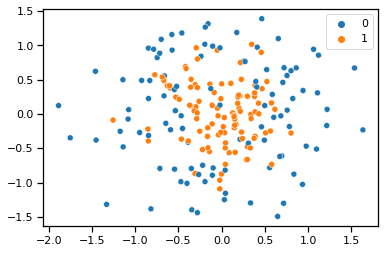

In [205]:
X, y = datasets.make_circles(n_samples=200, factor=0.3, noise=0.35, random_state=0)
sns.scatterplot(x=X[:,0], y=X[:,1], hue=y);

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

First, we use a **decision tree classifier** with **default** configuration of **hyper parameter**:

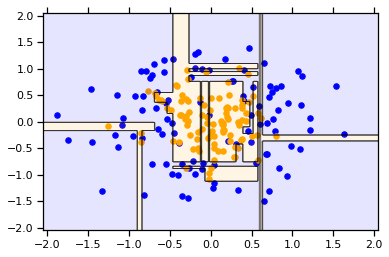

The Training F1 Score is 1.0
The Testing F1 Score is 0.7000000000000001


In [206]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)
train_predictions = clf.predict(X_train)
test_predictions = clf.predict(X_test)

plot_model(X, y, clf)
print('The Training F1 Score is', f1_score(train_predictions, y_train))
print('The Testing F1 Score is', f1_score(test_predictions, y_test))

Then we use **GridSearch** Cross Validation in order to **optimize the hyper parameter**:

Fitting 3 folds for each of 64 candidates, totalling 192 fits


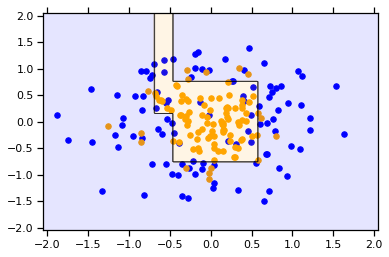

The training F1 Score is 0.8502994011976047
The testing F1 Score is 0.7567567567567567
DecisionTreeClassifier(max_depth=4, min_samples_leaf=4, random_state=42)


In [207]:
clf = DecisionTreeClassifier(random_state=42)

parameters = {
    'max_depth': [2, 4, 8, 16],
    'min_samples_leaf': [2, 4, 8, 16],
    'min_samples_split': [2, 4, 8, 16]
}

scorer = make_scorer(f1_score)
grid_obj = GridSearchCV(clf, parameters, cv=3, scoring=scorer, verbose=1)
grid_fit = grid_obj.fit(X_train, y_train)
best_clf = grid_fit.best_estimator_
best_clf.fit(X_train, y_train)

best_train_predictions = best_clf.predict(X_train)
best_test_predictions = best_clf.predict(X_test)

plot_model(X, y, best_clf)
print('The training F1 Score is', f1_score(best_train_predictions, y_train))
print('The testing F1 Score is', f1_score(best_test_predictions, y_test))
print(best_clf)

There is no guarantee, that GridSearch finds a better result. One reason for this is, that GridSearch uses **F-Fold Cross Validation**.